In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [15]:
df=pd.read_csv('loan_default_prediction_project(1).csv')

In [16]:
df.head()

Age  Gender        Income Employment_Status  Location  Credit_Score  \
0   56    Male  71266.105175          Employed  Suburban           639   
1   46     NaN  37283.054601          Employed  Suburban           474   
2   32    Male  69567.036392          Employed     Urban           750   
3   60  Female  72016.087392          Employed     Rural           435   
4   25  Female  32161.988250        Unemployed  Suburban           315   

   Debt_to_Income_Ratio  Existing_Loan_Balance  Loan_Status   Loan_Amount  \
0              0.007142           27060.188289  Non-Default  13068.330587   
1              0.456731           40192.994312      Default  15159.338369   
2              0.329231           25444.262759      Default   6131.287659   
3              0.052482            3122.213749  Non-Default  37531.880251   
4              0.450236           19197.350445  Non-Default  41466.397989   

   Interest_Rate  Loan_Duration_Months  
0      18.185533                    59  
1      11.727471                    69  
2      17.030462                    69  
3      16.868949                    26  
4      18.891582                    66

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    1000 non-null   int64  
 1   Gender                 792 non-null    object 
 2   Income                 1000 non-null   float64
 3   Employment_Status      906 non-null    object 
 4   Location               1000 non-null   object 
 5   Credit_Score           1000 non-null   int64  
 6   Debt_to_Income_Ratio   1000 non-null   float64
 7   Existing_Loan_Balance  1000 non-null   float64
 8   Loan_Status            1000 non-null   object 
 9   Loan_Amount            1000 non-null   float64
 10  Interest_Rate          1000 non-null   float64
 11  Loan_Duration_Months   1000 non-null   int64  
dtypes: float64(5), int64(3), object(4)
memory usage: 93.9+ KB


In [18]:
df.drop('Gender',axis=1,inplace=True)

In [19]:
df['Employment_Status'].value_counts()

Employment_Status
Employed      596
Unemployed    310
Name: count, dtype: int64

In [20]:
df['Employment_Status'].isnull().sum()

94

In [21]:
df.dropna(axis=0,inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 906 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    906 non-null    int64  
 1   Income                 906 non-null    float64
 2   Employment_Status      906 non-null    object 
 3   Location               906 non-null    object 
 4   Credit_Score           906 non-null    int64  
 5   Debt_to_Income_Ratio   906 non-null    float64
 6   Existing_Loan_Balance  906 non-null    float64
 7   Loan_Status            906 non-null    object 
 8   Loan_Amount            906 non-null    float64
 9   Interest_Rate          906 non-null    float64
 10  Loan_Duration_Months   906 non-null    int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 84.9+ KB


In [8]:
df.describe()

Age         Income  Credit_Score  Debt_to_Income_Ratio  \
count  906.000000     906.000000    906.000000            906.000000   
mean    40.871965   60739.173800    568.700883              0.483685   
std     13.520402   24710.179111    162.302255              0.297072   
min     18.000000   20010.775440    250.000000              0.000628   
25%     29.000000   41003.269591    429.000000              0.220420   
50%     42.000000   60711.307003    565.500000              0.473533   
75%     52.000000   80698.925859    719.000000              0.734173   
max     64.000000  150000.000000    849.000000              0.999849   

       Existing_Loan_Balance   Loan_Amount  Interest_Rate  \
count             906.000000    906.000000     906.000000   
mean            25314.935377  27807.338164      11.512604   
std             14206.259205  13023.658504       4.903207   
min                80.059377   5071.073949       3.003148   
25%             13436.658014  16810.203190       7.416983   
50%             25550.551856  28063.003901      11.422662   
75%             37372.188122  39486.291630      15.532023   
max             49987.578171  49969.232069      19.991438   

       Loan_Duration_Months  
count            906.000000  
mean              42.207506  
std               17.097930  
min               12.000000  
25%               27.000000  
50%               42.000000  
75%               57.000000  
max               71.000000

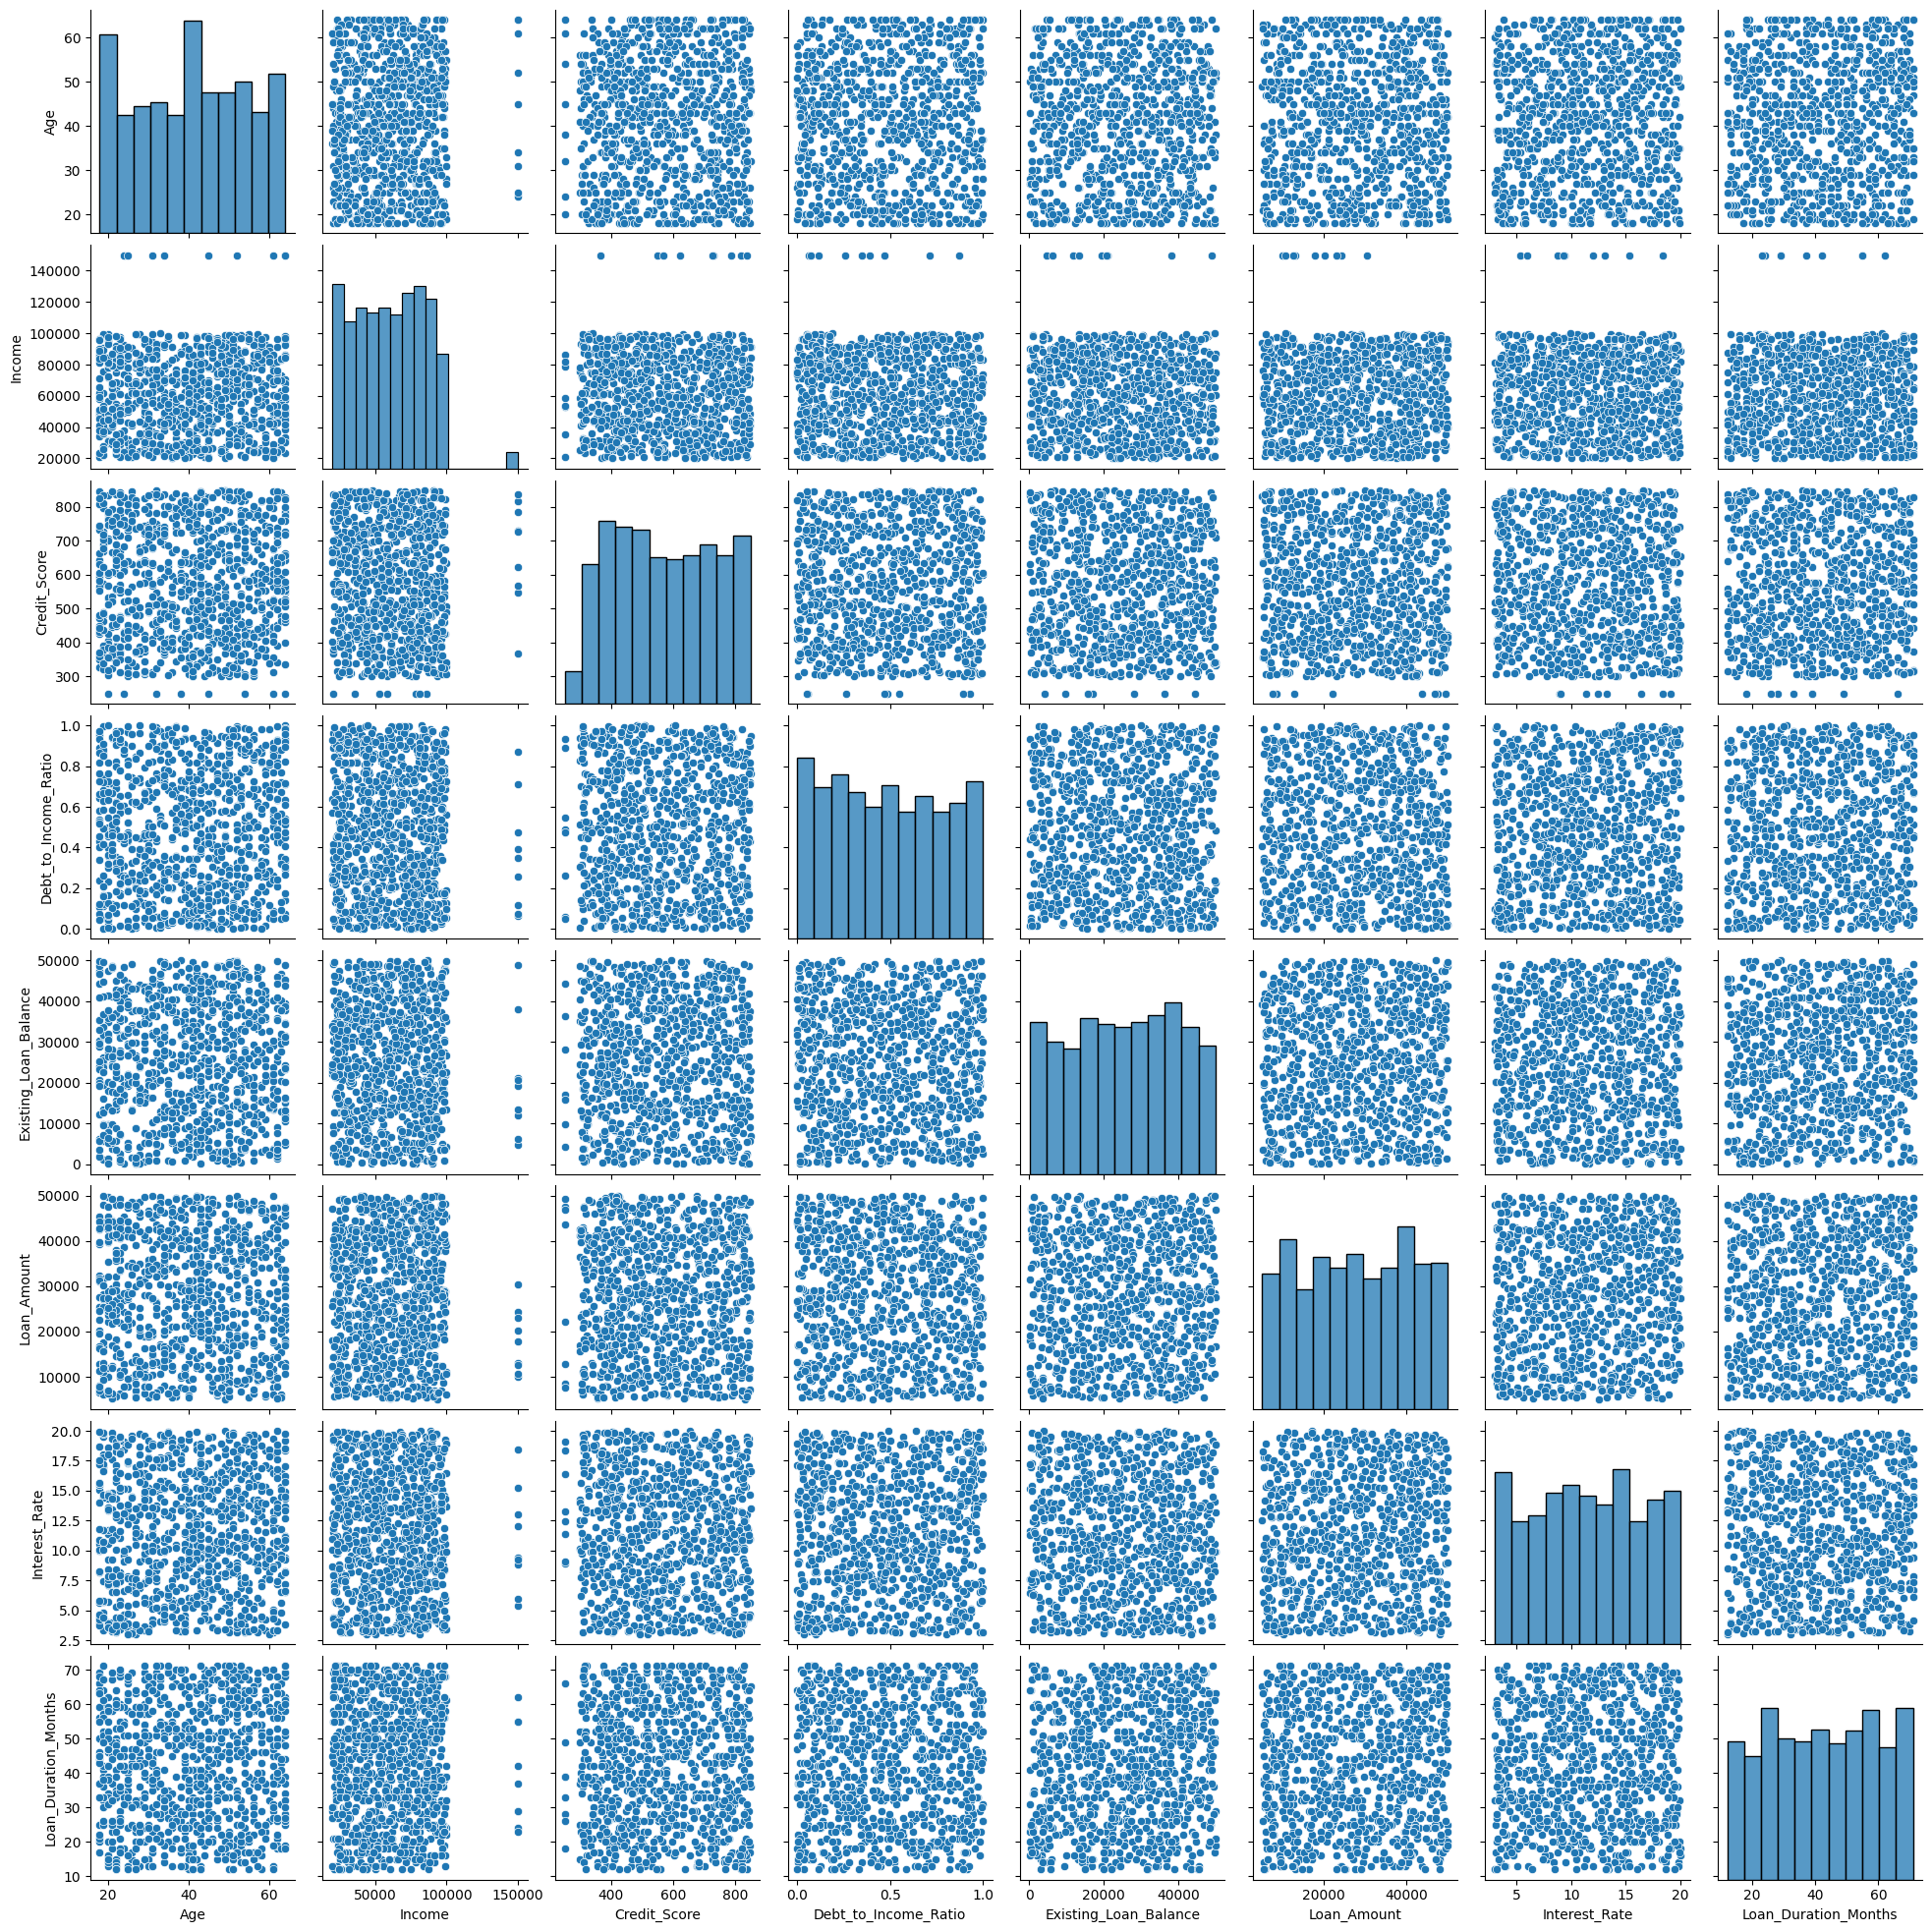

In [11]:
sns.pairplot(df)

#### checking for some outliers in income

<Axes: xlabel='Income', ylabel='Count'>

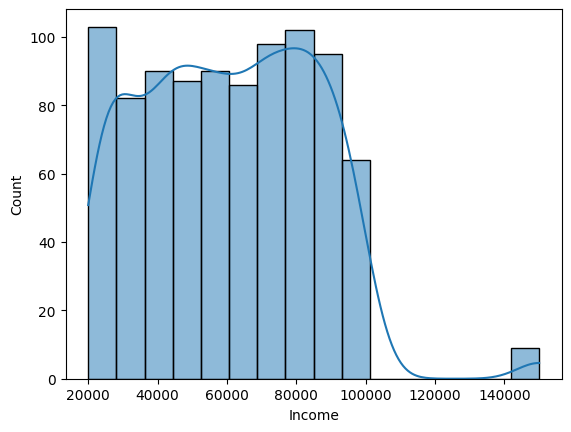

In [13]:
sns.histplot(df['Income'],kde=True)

In [27]:
df[df.Income > df.Income.mean() + 3*df.Income.std()]

Age    Income Employment_Status  Location  Credit_Score  \
50   45  150000.0          Employed     Urban           367   
51   64  150000.0        Unemployed     Urban           548   
52   24  150000.0        Unemployed  Suburban           622   
53   61  150000.0          Employed     Rural           817   
54   25  150000.0          Employed  Suburban           731   
55   64  150000.0          Employed     Rural           786   
56   52  150000.0        Unemployed     Rural           728   
57   31  150000.0          Employed  Suburban           568   
58   34  150000.0          Employed     Rural           836   

    Debt_to_Income_Ratio  Existing_Loan_Balance  Loan_Status   Loan_Amount  \
50              0.063901           11874.302118  Non-Default   9994.766626   
51              0.074335           48945.977806  Non-Default  12970.465592   
52              0.115363           19318.406857      Default  24289.917098   
53              0.869681           13362.934257      Default  10702.073086   
54              0.472226           21075.559126      Default  30483.326468   
55              0.712882            4719.873795  Non-Default  22928.020997   
56              0.392909            6285.295326  Non-Default  17806.810754   
57              0.258711           20721.702348  Non-Default  12649.541586   
58              0.347192           38122.226097      Default  20090.220726   

    Interest_Rate  Loan_Duration_Months  
50       8.791336                    29  
51       9.410904                    62  
52      18.408655                    55  
53      12.011965                    42  
54       5.341970                    24  
55       9.273955                    37  
56      15.275657                    55  
57       5.961131                    23  
58      13.033930                    29

In [9]:
df_1=df[df.Income < df.Income.mean() + 3*df.Income.std()]

In [10]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 897 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    897 non-null    int64  
 1   Income                 897 non-null    float64
 2   Employment_Status      897 non-null    object 
 3   Location               897 non-null    object 
 4   Credit_Score           897 non-null    int64  
 5   Debt_to_Income_Ratio   897 non-null    float64
 6   Existing_Loan_Balance  897 non-null    float64
 7   Loan_Status            897 non-null    object 
 8   Loan_Amount            897 non-null    float64
 9   Interest_Rate          897 non-null    float64
 10  Loan_Duration_Months   897 non-null    int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 84.1+ KB


In [9]:
df.drop(['Employment_Status','Location','Loan_Status'],axis=1).corr()

Age    Income  Credit_Score  Debt_to_Income_Ratio  \
Age                    1.000000  0.031464      0.020273              0.017853   
Income                 0.031464  1.000000     -0.011904             -0.023798   
Credit_Score           0.020273 -0.011904      1.000000             -0.014660   
Debt_to_Income_Ratio   0.017853 -0.023798     -0.014660              1.000000   
Existing_Loan_Balance -0.009584 -0.021298      0.000330             -0.014891   
Loan_Amount            0.011274  0.012148     -0.041100             -0.016690   
Interest_Rate          0.026231 -0.014461     -0.028122              0.025956   
Loan_Duration_Months   0.058390 -0.009666     -0.010250              0.017012   

                       Existing_Loan_Balance  Loan_Amount  Interest_Rate  \
Age                                -0.009584     0.011274       0.026231   
Income                             -0.021298     0.012148      -0.014461   
Credit_Score                        0.000330    -0.041100      -0.028122   
Debt_to_Income_Ratio               -0.014891    -0.016690       0.025956   
Existing_Loan_Balance               1.000000    -0.004777       0.010786   
Loan_Amount                        -0.004777     1.000000       0.093929   
Interest_Rate                       0.010786     0.093929       1.000000   
Loan_Duration_Months                0.061004     0.036979       0.009483   

                       Loan_Duration_Months  
Age                                0.058390  
Income                            -0.009666  
Credit_Score                      -0.010250  
Debt_to_Income_Ratio               0.017012  
Existing_Loan_Balance              0.061004  
Loan_Amount                        0.036979  
Interest_Rate                      0.009483  
Loan_Duration_Months               1.000000

In [11]:
df_2=df_1.copy()

In [12]:
df_2['Loan_Status']=df['Loan_Status'].map({'Non-Default':0,'Default':1})

<Axes: >

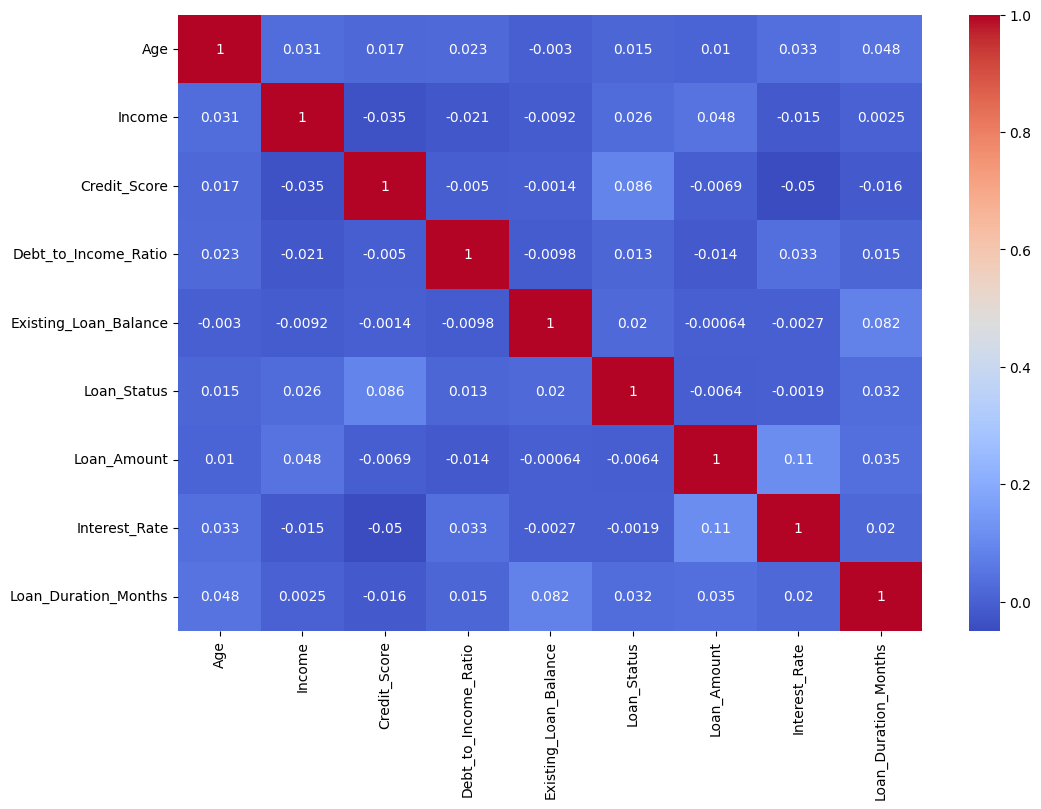

In [47]:
plt.figure(figsize=(12,8))
sns.heatmap(df_2.drop(['Employment_Status','Location'],axis=1).corr(),cmap='coolwarm',annot=True)


In [16]:
df_2

Age        Income Employment_Status  Location  Credit_Score  \
0     56  71266.105175          Employed  Suburban           639   
1     46  37283.054601          Employed  Suburban           474   
2     32  69567.036392          Employed     Urban           750   
3     60  72016.087392          Employed     Rural           435   
4     25  32161.988250        Unemployed  Suburban           315   
..   ...           ...               ...       ...           ...   
994   27  61703.683812        Unemployed     Urban           306   
995   22  98081.105862        Unemployed     Urban           727   
996   40  30044.017181          Employed     Rural           416   
997   27  21355.813191        Unemployed     Rural           806   
999   19  84572.442989        Unemployed  Suburban           624   

     Debt_to_Income_Ratio  Existing_Loan_Balance  Loan_Status   Loan_Amount  \
0                0.007142           27060.188289            0  13068.330587   
1                0.456731           40192.994312            1  15159.338369   
2                0.329231           25444.262759            1   6131.287659   
3                0.052482            3122.213749            0  37531.880251   
4                0.450236           19197.350445            0  41466.397989   
..                    ...                    ...          ...           ...   
994              0.835540            1486.813065            0   8447.484392   
995              0.961613            3586.586891            0  41473.241896   
996              0.775082           32993.493341            1  48942.588814   
997              0.621937           21579.216456            1  34010.252873   
999              0.849470           49629.885929            0  49850.267385   

     Interest_Rate  Loan_Duration_Months  
0        18.185533                    59  
1        11.727471                    69  
2        17.030462                    69  
3        16.868949                    26  
4        18.891582                    66  
..             ...                   ...  
994      11.445092                    42  
995       3.700707                    23  
996      12.932559                    62  
997       3.825633                    55  
999      16.606985                    49  

[897 rows x 11 columns]

In [26]:
loc=df_2.groupby(['Location'])['Loan_Status'].value_counts().reset_index()

In [27]:
loc

Location  Loan_Status  count
0     Rural            0    250
1     Rural            1     58
2  Suburban            0    241
3  Suburban            1     63
4     Urban            0    231
5     Urban            1     54

<Axes: xlabel='Location', ylabel='count'>

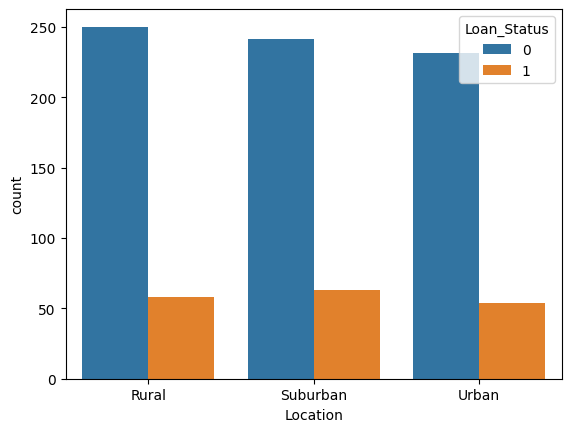

In [28]:
sns.barplot(data=loc,x='Location',y='count',hue='Loan_Status')

<Axes: xlabel='Age', ylabel='Count'>

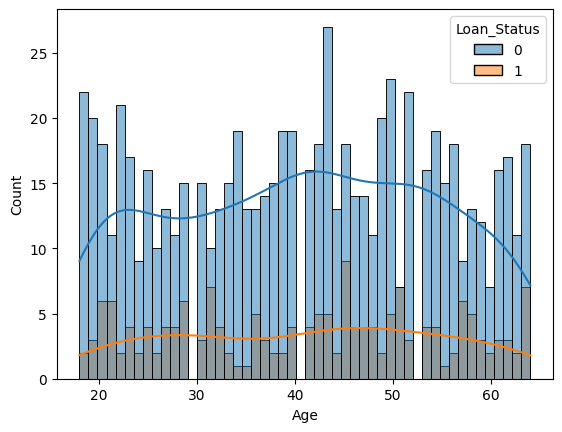

In [31]:
sns.histplot(data=df_2,x=df_2['Age'],hue='Loan_Status',bins=50,kde=True)

<Axes: xlabel='Income', ylabel='Count'>

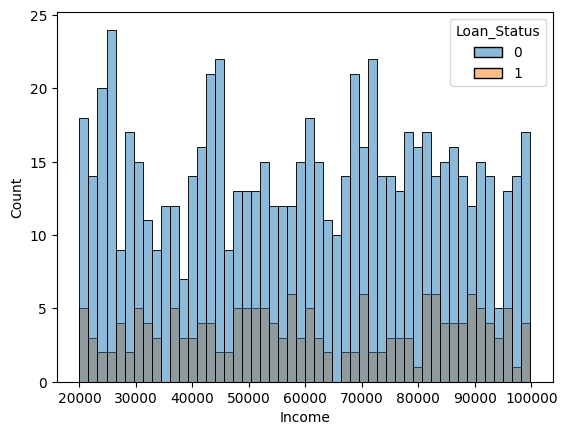

In [29]:
sns.histplot(data=df_2,x=df_2['Income'],hue='Loan_Status',bins=50)

In [18]:
loan_status=df_2.groupby(['Employment_Status'])['Loan_Status'].value_counts().reset_index()

In [19]:
loan_status

Employment_Status  Loan_Status  count
0          Employed            0    474
1          Employed            1    116
2        Unemployed            0    248
3        Unemployed            1     59

<Axes: xlabel='Employment_Status', ylabel='count'>

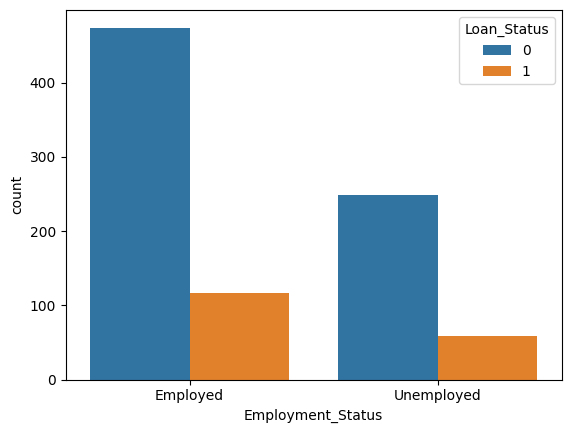

In [20]:
sns.barplot(data=loan_status,x='Employment_Status',y='count',hue='Loan_Status')

<Axes: xlabel='Credit_Score', ylabel='Count'>

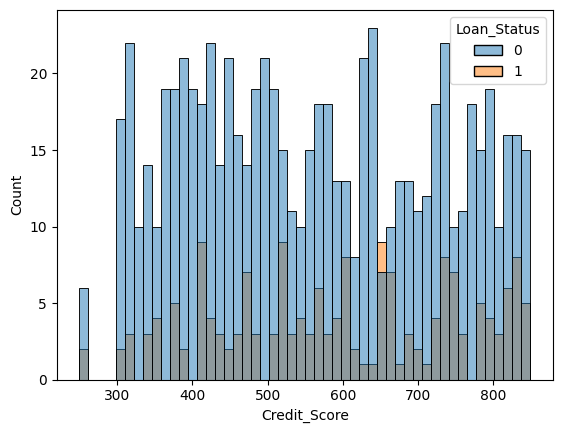

In [62]:
sns.histplot(data=df_2,x=df_2['Credit_Score'],hue='Loan_Status',bins=50)

<Axes: xlabel='Debt_to_Income_Ratio', ylabel='Count'>

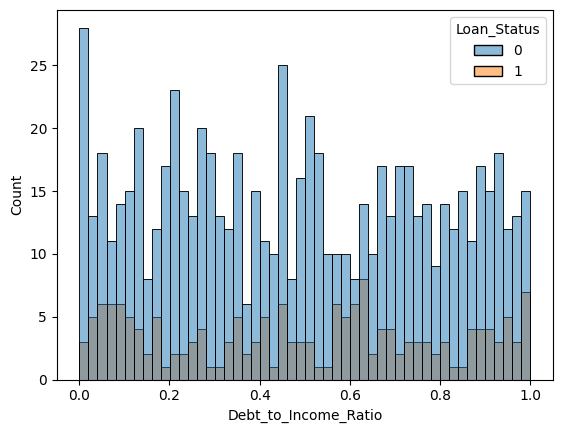

In [21]:
sns.histplot(data=df_2,x=df_2['Debt_to_Income_Ratio'],hue='Loan_Status',bins=50)

<Axes: xlabel='Existing_Loan_Balance', ylabel='Count'>

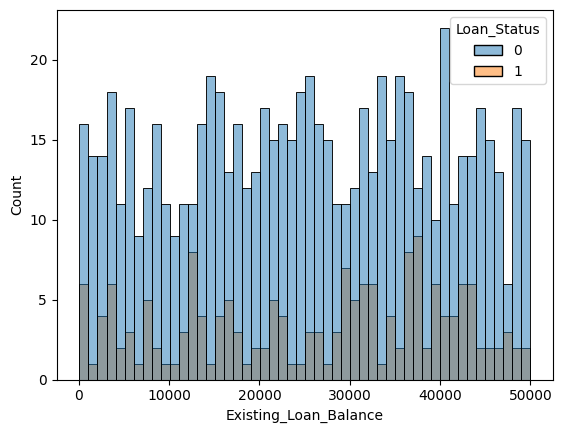

In [22]:
sns.histplot(data=df_2,x=df_2['Existing_Loan_Balance'],hue='Loan_Status',bins=50)

<Axes: xlabel='Loan_Amount', ylabel='Count'>

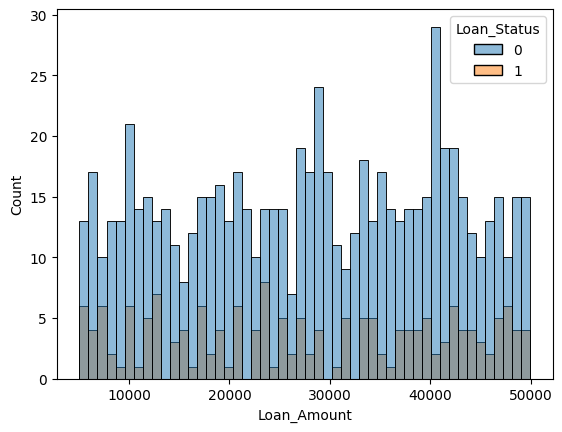

In [23]:
sns.histplot(data=df_2,x=df_2['Loan_Amount'],hue='Loan_Status',bins=50)

<Axes: xlabel='Loan_Duration_Months', ylabel='Count'>

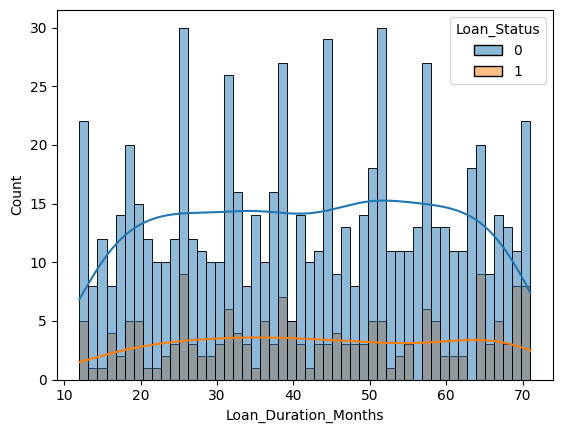

In [25]:
sns.histplot(data=df_2,x=df_2['Loan_Duration_Months'],hue='Loan_Status',bins=50,kde=True)

<Axes: xlabel='Interest_Rate', ylabel='Count'>

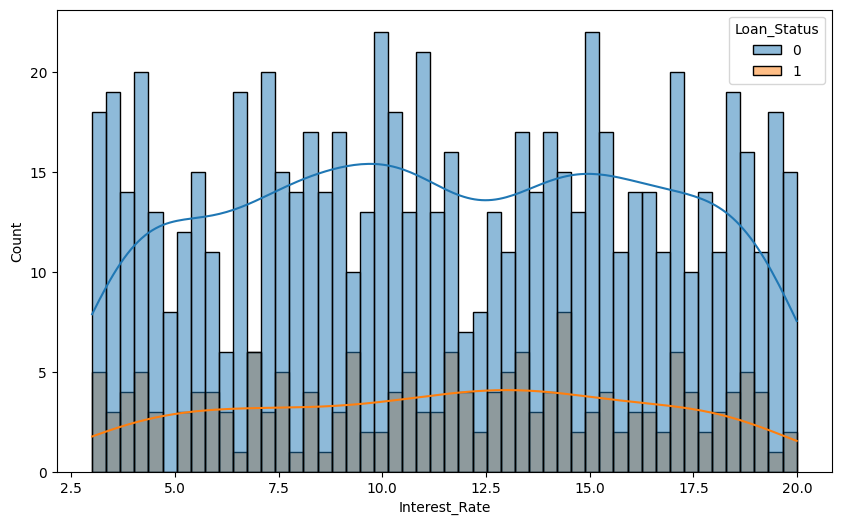

In [65]:
plt.figure(figsize=(10,6))
sns.histplot(x='Interest_Rate',data=df_2,hue='Loan_Status',kde=True,bins=50)

In [17]:
df_2

Age        Income Employment_Status  Location  Credit_Score  \
0     56  71266.105175          Employed  Suburban           639   
1     46  37283.054601          Employed  Suburban           474   
2     32  69567.036392          Employed     Urban           750   
3     60  72016.087392          Employed     Rural           435   
4     25  32161.988250        Unemployed  Suburban           315   
..   ...           ...               ...       ...           ...   
994   27  61703.683812        Unemployed     Urban           306   
995   22  98081.105862        Unemployed     Urban           727   
996   40  30044.017181          Employed     Rural           416   
997   27  21355.813191        Unemployed     Rural           806   
999   19  84572.442989        Unemployed  Suburban           624   

     Debt_to_Income_Ratio  Existing_Loan_Balance  Loan_Status   Loan_Amount  \
0                0.007142           27060.188289            0  13068.330587   
1                0.456731           40192.994312            1  15159.338369   
2                0.329231           25444.262759            1   6131.287659   
3                0.052482            3122.213749            0  37531.880251   
4                0.450236           19197.350445            0  41466.397989   
..                    ...                    ...          ...           ...   
994              0.835540            1486.813065            0   8447.484392   
995              0.961613            3586.586891            0  41473.241896   
996              0.775082           32993.493341            1  48942.588814   
997              0.621937           21579.216456            1  34010.252873   
999              0.849470           49629.885929            0  49850.267385   

     Interest_Rate  Loan_Duration_Months  
0        18.185533                    59  
1        11.727471                    69  
2        17.030462                    69  
3        16.868949                    26  
4        18.891582                    66  
..             ...                   ...  
994      11.445092                    42  
995       3.700707                    23  
996      12.932559                    62  
997       3.825633                    55  
999      16.606985                    49  

[897 rows x 11 columns]

<Figure size 1100x700 with 0 Axes>

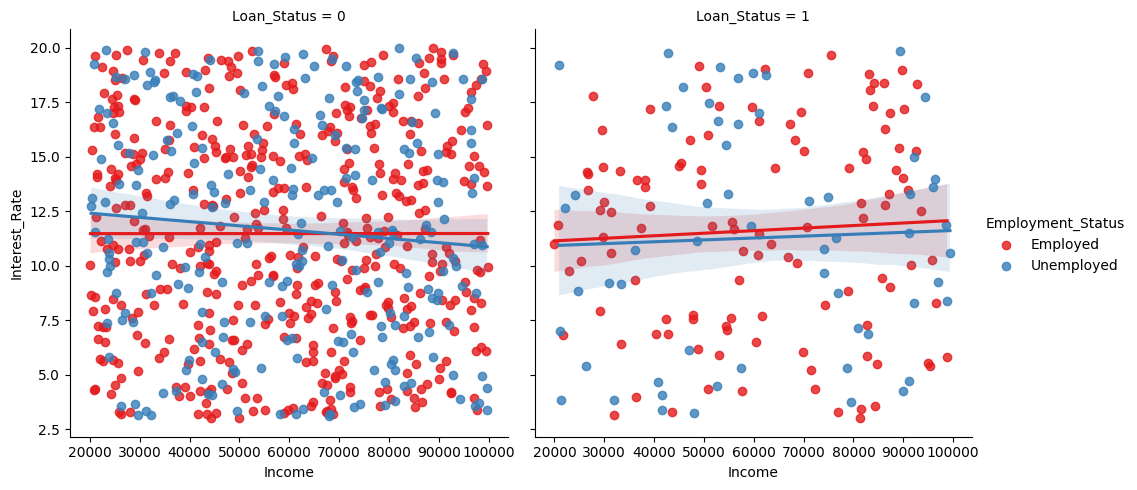

In [66]:
plt.figure(figsize=(11,7))
sns.lmplot(y='Interest_Rate',x='Income',data=df_2,hue='Employment_Status',
           col='Loan_Status',palette='Set1')

In [67]:
df

Age        Income Employment_Status  Location  Credit_Score  \
0     56  71266.105175          Employed  Suburban           639   
1     46  37283.054601          Employed  Suburban           474   
2     32  69567.036392          Employed     Urban           750   
3     60  72016.087392          Employed     Rural           435   
4     25  32161.988250        Unemployed  Suburban           315   
..   ...           ...               ...       ...           ...   
994   27  61703.683812        Unemployed     Urban           306   
995   22  98081.105862        Unemployed     Urban           727   
996   40  30044.017181          Employed     Rural           416   
997   27  21355.813191        Unemployed     Rural           806   
999   19  84572.442989        Unemployed  Suburban           624   

     Debt_to_Income_Ratio  Existing_Loan_Balance  Loan_Status   Loan_Amount  \
0                0.007142           27060.188289  Non-Default  13068.330587   
1                0.456731           40192.994312      Default  15159.338369   
2                0.329231           25444.262759      Default   6131.287659   
3                0.052482            3122.213749  Non-Default  37531.880251   
4                0.450236           19197.350445  Non-Default  41466.397989   
..                    ...                    ...          ...           ...   
994              0.835540            1486.813065  Non-Default   8447.484392   
995              0.961613            3586.586891  Non-Default  41473.241896   
996              0.775082           32993.493341      Default  48942.588814   
997              0.621937           21579.216456      Default  34010.252873   
999              0.849470           49629.885929  Non-Default  49850.267385   

     Interest_Rate  Loan_Duration_Months  
0        18.185533                    59  
1        11.727471                    69  
2        17.030462                    69  
3        16.868949                    26  
4        18.891582                    66  
..             ...                   ...  
994      11.445092                    42  
995       3.700707                    23  
996      12.932559                    62  
997       3.825633                    55  
999      16.606985                    49  

[906 rows x 11 columns]

In [18]:
df_3=pd.get_dummies(columns=['Employment_Status','Location'],drop_first=True,dtype=int,data=df_2)

In [19]:
df_3

Age        Income  Credit_Score  Debt_to_Income_Ratio  \
0     56  71266.105175           639              0.007142   
1     46  37283.054601           474              0.456731   
2     32  69567.036392           750              0.329231   
3     60  72016.087392           435              0.052482   
4     25  32161.988250           315              0.450236   
..   ...           ...           ...                   ...   
994   27  61703.683812           306              0.835540   
995   22  98081.105862           727              0.961613   
996   40  30044.017181           416              0.775082   
997   27  21355.813191           806              0.621937   
999   19  84572.442989           624              0.849470   

     Existing_Loan_Balance  Loan_Status   Loan_Amount  Interest_Rate  \
0             27060.188289            0  13068.330587      18.185533   
1             40192.994312            1  15159.338369      11.727471   
2             25444.262759            1   6131.287659      17.030462   
3              3122.213749            0  37531.880251      16.868949   
4             19197.350445            0  41466.397989      18.891582   
..                     ...          ...           ...            ...   
994            1486.813065            0   8447.484392      11.445092   
995            3586.586891            0  41473.241896       3.700707   
996           32993.493341            1  48942.588814      12.932559   
997           21579.216456            1  34010.252873       3.825633   
999           49629.885929            0  49850.267385      16.606985   

     Loan_Duration_Months  Employment_Status_Unemployed  Location_Suburban  \
0                      59                             0                  1   
1                      69                             0                  1   
2                      69                             0                  0   
3                      26                             0                  0   
4                      66                             1                  1   
..                    ...                           ...                ...   
994                    42                             1                  0   
995                    23                             1                  0   
996                    62                             0                  0   
997                    55                             1                  0   
999                    49                             1                  1   

     Location_Urban  
0                 0  
1                 0  
2                 1  
3                 0  
4                 0  
..              ...  
994               1  
995               1  
996               0  
997               0  
999               0  

[897 rows x 12 columns]

In [869]:
X=df_3.drop('Loan_Status',axis=1)
y=df_3['Loan_Status']

In [870]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=50)

In [22]:
from sklearn.tree import DecisionTreeClassifier

In [217]:
clf=DecisionTreeClassifier()

In [218]:
clf.fit(X,y)

DecisionTreeClassifier()

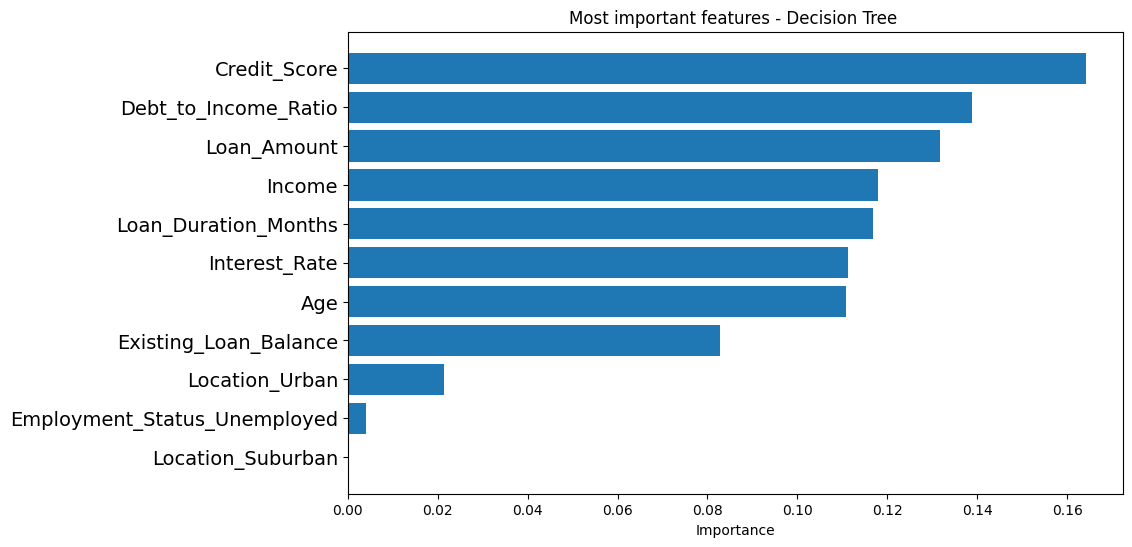

In [201]:
feature_names = X_train.columns
feature_imports = clf.feature_importances_
most_imp_features = pd.DataFrame([f for f in zip(feature_names,feature_imports)], columns=["Feature", "Importance"]).nlargest(11, "Importance")
most_imp_features.sort_values(by="Importance", inplace=True)
plt.figure(figsize=(10,6))
plt.barh(range(len(most_imp_features)), most_imp_features.Importance, align='center', alpha=1)
plt.yticks(range(len(most_imp_features)), most_imp_features.Feature, fontsize=14)
plt.xlabel('Importance')
plt.title('Most important features - Decision Tree ')
plt.show()


In [63]:
pred=clf.predict(X_test)

In [25]:
from sklearn import metrics

In [65]:
print(metrics.classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       139
           1       1.00      1.00      1.00        41

    accuracy                           1.00       180
   macro avg       1.00      1.00      1.00       180
weighted avg       1.00      1.00      1.00       180



In [66]:
clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [67]:
pred=clf.predict(X_test)

In [68]:
print(metrics.classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.75      0.76      0.76       139
           1       0.15      0.15      0.15        41

    accuracy                           0.62       180
   macro avg       0.45      0.45      0.45       180
weighted avg       0.62      0.62      0.62       180



In [202]:
from sklearn.ensemble import RandomForestClassifier

In [203]:
clf=RandomForestClassifier()

In [204]:
clf.fit(X_train,y_train)

RandomForestClassifier()

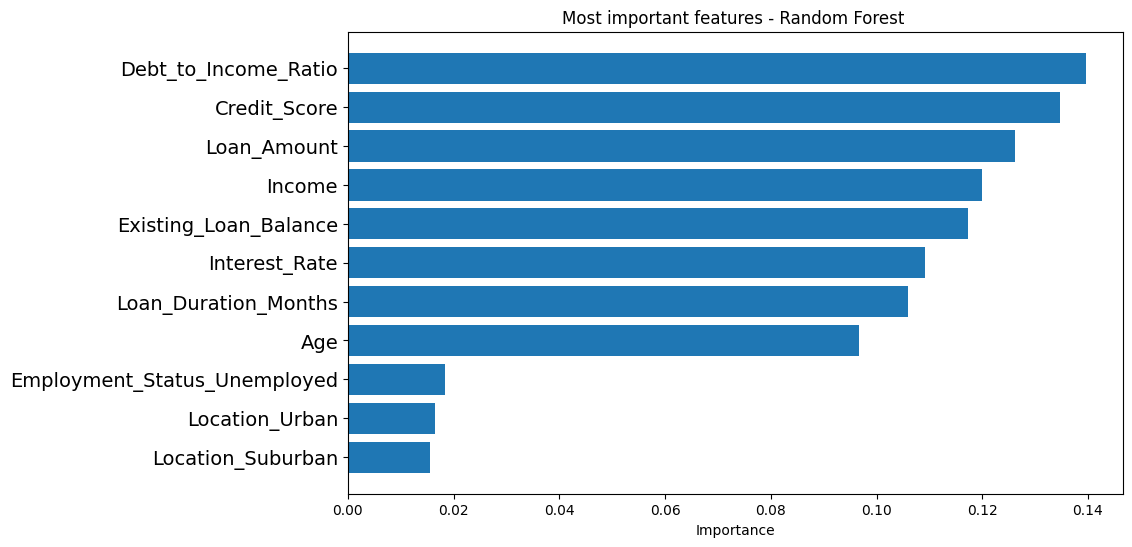

In [205]:
feature_names = X_train.columns
feature_imports = clf.feature_importances_
most_imp_features = pd.DataFrame([f for f in zip(feature_names,feature_imports)], columns=["Feature", "Importance"]).nlargest(11, "Importance")
most_imp_features.sort_values(by="Importance", inplace=True)
plt.figure(figsize=(10,6))
plt.barh(range(len(most_imp_features)), most_imp_features.Importance, align='center', alpha=1)
plt.yticks(range(len(most_imp_features)), most_imp_features.Feature, fontsize=14)
plt.xlabel('Importance')
plt.title('Most important features - Random Forest ')
plt.show()

In [206]:
predictions=clf.predict(X_test)

In [207]:
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.78      1.00      0.87       139
           1       1.00      0.02      0.05        41

    accuracy                           0.78       180
   macro avg       0.89      0.51      0.46       180
weighted avg       0.83      0.78      0.69       180



In [871]:
clas=y_train.value_counts().reset_index()
clas

Loan_Status  count
0            0    583
1            1    134

<Axes: xlabel='Loan_Status', ylabel='count'>

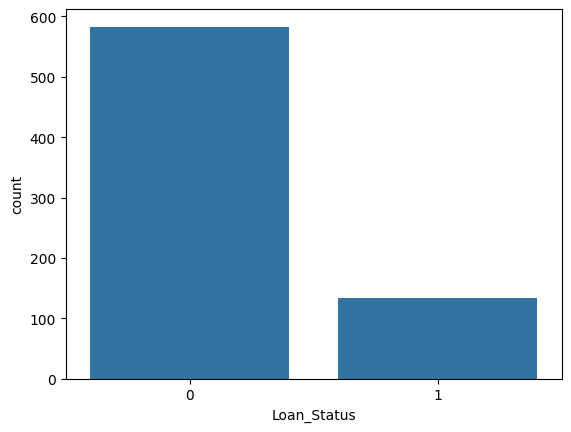

In [872]:
sns.barplot(data=clas,x='Loan_Status',y='count')

In [873]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)

In [874]:
y_sm.value_counts()

Loan_Status
0    722
1    722
Name: count, dtype: int64

In [875]:
X_train,X_test,y_train,y_test=train_test_split(X_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)

In [704]:
clf=DecisionTreeClassifier()

In [705]:
clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [706]:
predictions=clf.predict(X_test)

In [707]:
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.71      0.70      0.71       145
           1       0.70      0.71      0.71       144

    accuracy                           0.71       289
   macro avg       0.71      0.71      0.71       289
weighted avg       0.71      0.71      0.71       289



In [533]:
from sklearn.metrics import roc_curve,roc_auc_score

In [534]:
y_score =clf.predict_proba(X_test)[:,1]

In [535]:
fpr,tpr,threshold=roc_curve(y_test,y_score)

In [536]:
roc_auc_score(y_test,y_score)

0.7093151340996168

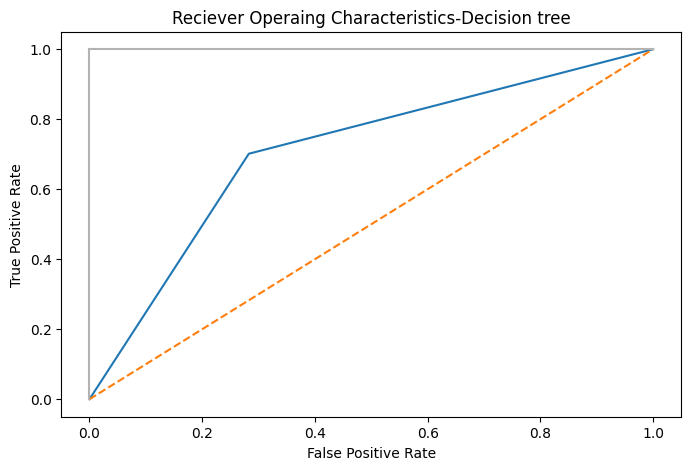

In [537]:
plt.subplots(1,figsize=(8,5))
plt.title('Reciever Operaing Characteristics-Decision tree')
plt.plot(fpr,tpr)
plt.plot([0,1],ls="--")
plt.plot([0,0],[1,0],c=".7"),plt.plot([1,1],c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [134]:
from sklearn.model_selection import GridSearchCV

In [204]:


# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"],
    'min_samples_split':[2,3,5,10]
}

In [205]:
grid_search = GridSearchCV(estimator=clf, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=2, scoring = "accuracy")

In [206]:
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 200 candidates, totalling 800 fits


GridSearchCV(cv=4,
             estimator=DecisionTreeClassifier(criterion='entropy', max_depth=20,
                                              min_samples_leaf=3,
                                              min_samples_split=5),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100],
                         'min_samples_split': [2, 3, 5, 10]},
             scoring='accuracy', verbose=2)

In [207]:
score_df = pd.DataFrame(grid_search.cv_results_)

In [243]:
score_df.nlargest(5,"mean_test_score")

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
42        0.049619      0.036216         0.005005    9.375243e-04   
44        0.037619      0.031455         0.004000    1.976862e-07   
160       0.032370      0.008322         0.004628    1.474577e-03   
162       0.029400      0.005328         0.008382    6.521135e-03   
40        0.021659      0.014136         0.005660    1.218471e-03   

    param_criterion param_max_depth param_min_samples_leaf  \
42             gini               5                      5   
44             gini               5                     10   
160         entropy              10                      5   
162         entropy              10                      5   
40             gini               5                      5   

    param_min_samples_split  \
42                        5   
44                        2   
160                       2   
162                       5   
40                        2   

                                                params  split0_test_score  \
42   {'criterion': 'gini', 'max_depth': 5, 'min_sam...           0.840278   
44   {'criterion': 'gini', 'max_depth': 5, 'min_sam...           0.854167   
160  {'criterion': 'entropy', 'max_depth': 10, 'min...           0.875000   
162  {'criterion': 'entropy', 'max_depth': 10, 'min...           0.875000   
40   {'criterion': 'gini', 'max_depth': 5, 'min_sam...           0.840278   

     split1_test_score  split2_test_score  split3_test_score  mean_test_score  \
42            0.744828           0.806897           0.722222         0.778556   
44            0.731034           0.806897           0.701389         0.773372   
160           0.717241           0.800000           0.673611         0.766463   
162           0.717241           0.800000           0.673611         0.766463   
40            0.682759           0.806897           0.722222         0.763039   

     std_test_score  rank_test_score  
42         0.047233                1  
44         0.060468                2  
160        0.077378                3  
162        0.077378                3  
40         0.063246                5

In [208]:
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=10, min_samples_leaf=10)

In [714]:
clf=DecisionTreeClassifier(max_depth=100, min_samples_leaf=5, min_samples_split=2,criterion='entropy')

In [715]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=100, min_samples_leaf=5)

In [716]:
pred=clf.predict(X_test)

In [717]:
decision_tree_acc=metrics.accuracy_score(pred,y_test)
decision_tree_prec=metrics.precision_score(pred,y_test)
decision_tree_recall=metrics.recall_score(pred,y_test)

In [718]:
decision_tree_acc,decision_tree_prec,decision_tree_recall

(0.7370242214532872, 0.7361111111111112, 0.7361111111111112)

In [719]:
print(metrics.classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.74      0.74      0.74       145
           1       0.74      0.74      0.74       144

    accuracy                           0.74       289
   macro avg       0.74      0.74      0.74       289
weighted avg       0.74      0.74      0.74       289



In [720]:
y_score =clf.predict_proba(X_test)[:,1]

In [721]:
fpr_d,tpr_d,threshold=roc_curve(y_test,y_score)

In [722]:
auc_d=roc_auc_score(y_test,y_score)

In [723]:
auc_d

0.7651580459770115

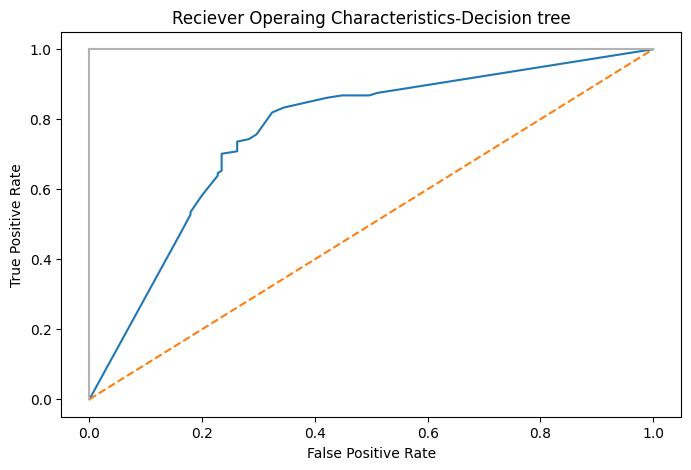

In [724]:
plt.subplots(1,figsize=(8,5))
plt.title('Reciever Operaing Characteristics-Decision tree')
plt.plot(fpr_d,tpr_d)
plt.plot([0,1],ls="--")
plt.plot([0,0],[1,0],c=".7"),plt.plot([1,1],c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [326]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(DecisionTreeClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=5,criterion='gini'),X_test, y_test, cv=10)
scores.mean()

0.6158866995073892

In [327]:
scores

array([0.86206897, 0.48275862, 0.68965517, 0.55172414, 0.55172414,
       0.55172414, 0.68965517, 0.62068966, 0.55172414, 0.60714286])

In [328]:
from sklearn.ensemble import RandomForestClassifier

In [329]:
clf=RandomForestClassifier()

In [341]:
clf.fit(X_train,y_train)

RandomForestClassifier()

In [342]:
pred=clf.predict(X_test)

In [641]:
print(metrics.classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.75      0.75      0.75       145
           1       0.75      0.75      0.75       144

    accuracy                           0.75       289
   macro avg       0.75      0.75      0.75       289
weighted avg       0.75      0.75      0.75       289



In [642]:
print(metrics.confusion_matrix(y_test,pred))

[[109  36]
 [ 36 108]]


In [128]:
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [1,5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"],
    'min_samples_split':[2,3,5,10]
}

In [129]:
grid_search = GridSearchCV(estimator=clf, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=2, scoring = "recall")

In [130]:
grid_search.fit(X_train,y_train)

Fitting 4 folds for each of 240 candidates, totalling 960 fits


GridSearchCV(cv=4,
             estimator=RandomForestClassifier(criterion='entropy', max_depth=20,
                                              min_samples_split=10,
                                              n_estimators=300),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [1, 5, 10, 20, 50, 100],
                         'min_samples_split': [2, 3, 5, 10]},
             scoring='recall', verbose=2)

In [131]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=10, min_samples_split=3, n_estimators=300)

In [725]:
clf=RandomForestClassifier(n_estimators=500,criterion='entropy', max_depth=50, min_samples_leaf=3,
                       min_samples_split=5)

In [726]:
clf.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=50, min_samples_leaf=3,
                       min_samples_split=5, n_estimators=500)

In [390]:
pred=clf.predict(X_test)

In [391]:
random_forest_acc=metrics.accuracy_score(pred,y_test)
random_forest_prec=metrics.precision_score(pred,y_test)
random_forest_recall=metrics.recall_score(pred,y_test)

In [392]:
random_forest_acc,random_forest_prec,random_forest_recall

(0.8235294117647058, 0.8125, 0.8297872340425532)

In [393]:
print(metrics.classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.82      0.83      0.83       145
           1       0.83      0.81      0.82       144

    accuracy                           0.82       289
   macro avg       0.82      0.82      0.82       289
weighted avg       0.82      0.82      0.82       289



In [727]:
y_score =clf.predict_proba(X_test)[:,1]

In [728]:
fpr_rf,tpr_rf,threshold=roc_curve(y_test,y_score)

In [729]:
auc_rf=roc_auc_score(y_test,y_score)

In [730]:
auc_rf

0.8866858237547892

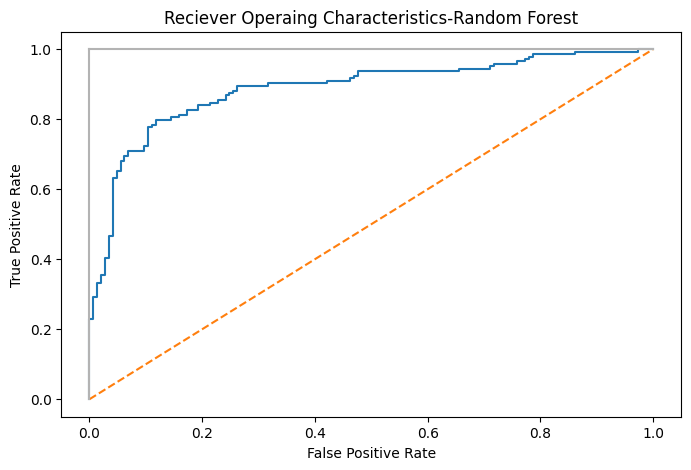

In [731]:
plt.subplots(1,figsize=(8,5))
plt.title('Reciever Operaing Characteristics-Random Forest')
plt.plot(fpr_rf,tpr_rf)
plt.plot([0,1],ls="--")
plt.plot([0,0],[1,0],c=".7"),plt.plot([1,1],c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [435]:
from sklearn.svm import SVC

In [436]:
clf=SVC(C=1,
    kernel="rbf",
    gamma=0.001
)

In [437]:
clf.fit(X_train,y_train)

SVC(C=1, gamma=0.001)

In [438]:
pred=clf.predict(X_test)

In [439]:
print(metrics.classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.51      1.00      0.68       145
           1       1.00      0.04      0.08       144

    accuracy                           0.52       289
   macro avg       0.76      0.52      0.38       289
weighted avg       0.76      0.52      0.38       289



In [342]:
from sklearn.neighbors import KNeighborsClassifier

In [441]:
clf=KNeighborsClassifier()

In [442]:
clf.fit(X_train,y_train)

KNeighborsClassifier()

In [443]:
pred=clf.predict(X_test)

In [444]:
print(metrics.classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.69      0.54      0.61       145
           1       0.62      0.75      0.68       144

    accuracy                           0.65       289
   macro avg       0.65      0.65      0.64       289
weighted avg       0.65      0.65      0.64       289



In [732]:
from sklearn.preprocessing import StandardScaler

In [827]:
scaler=StandardScaler()

In [828]:
X_sm_scaled=scaler.fit_transform(X_sm)

In [829]:
X_train,X_test,y_train,y_test=train_test_split(X_sm_scaled, y_sm, test_size=0.2, random_state=15, stratify=y_sm)

In [660]:
clf=KNeighborsClassifier()

In [661]:
clf.fit(X_train,y_train)

KNeighborsClassifier()

In [451]:
pred=clf.predict(X_test)

In [452]:
print(metrics.classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.80      0.57      0.66       145
           1       0.66      0.85      0.75       144

    accuracy                           0.71       289
   macro avg       0.73      0.71      0.70       289
weighted avg       0.73      0.71      0.70       289



In [453]:
def error_rate():
    error_rate=[]
    for i in range(1,40):

        model=KNeighborsClassifier(n_neighbors=i)
        model.fit(X_train,y_train)
        pred=model.predict(X_test)
        error_rate.append(np.mean(pred != y_test))
    
    return error_rate

In [454]:
error_rate=error_rate()

Text(0, 0.5, 'Error-Rate')

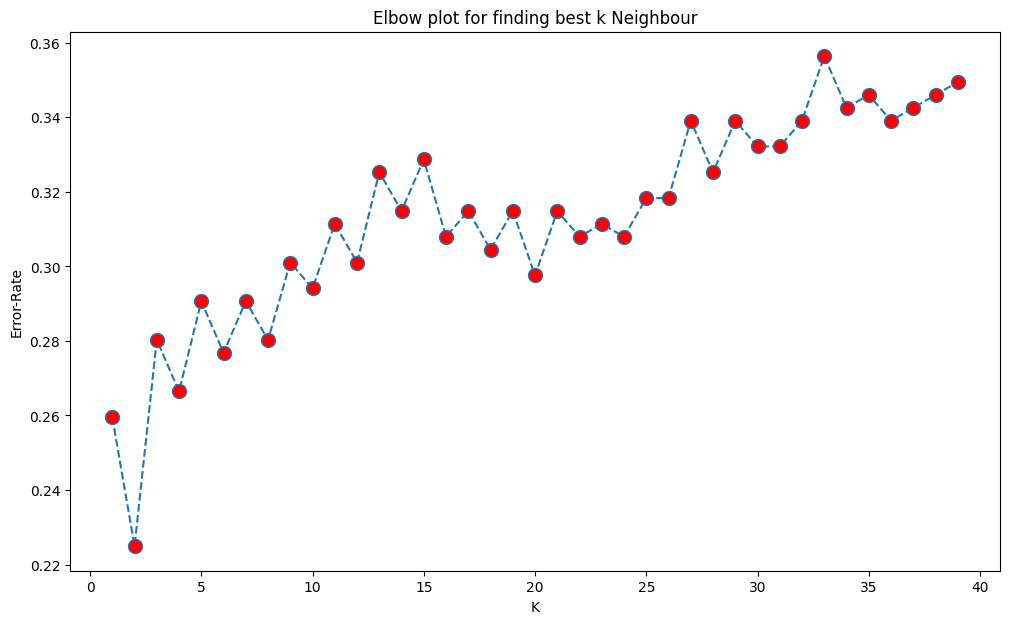

In [455]:
plt.figure(figsize=(12,7))
plt.plot(range(1,40),error_rate,linestyle="--",marker='o',markersize=10,markerfacecolor='red')
plt.title('Elbow plot for finding best k Neighbour')
plt.xlabel('K')
plt.ylabel('Error-Rate')

In [736]:
clf=KNeighborsClassifier(n_neighbors=2)

In [737]:
clf.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=2)

In [444]:
pred=clf.predict(X_test)

In [445]:
knn_acc=metrics.accuracy_score(pred,y_test)
knn_prec=metrics.precision_score(pred,y_test)
knn_recall=metrics.recall_score(pred,y_test)

In [446]:
knn_acc,knn_prec,knn_recall

(0.740484429065744, 0.6736111111111112, 0.776)

In [447]:
print(metrics.classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.71      0.81      0.76       145
           1       0.78      0.67      0.72       144

    accuracy                           0.74       289
   macro avg       0.74      0.74      0.74       289
weighted avg       0.74      0.74      0.74       289



In [738]:
y_score =clf.predict_proba(X_test)[:,1]

In [739]:
fpr_kn,tpr_kn,threshold=roc_curve(y_test,y_score)

In [740]:
auc_kn=roc_auc_score(y_test,y_score)

In [741]:
auc_kn

0.79477969348659

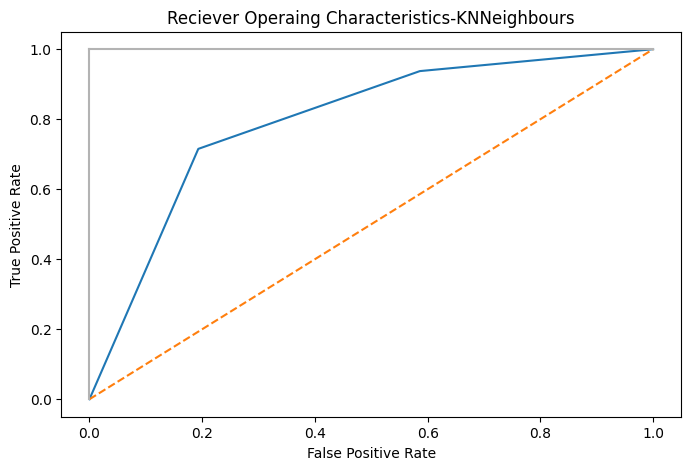

In [742]:
plt.subplots(1,figsize=(8,5))
plt.title('Reciever Operaing Characteristics-KNNeighbours')
plt.plot(fpr_kn,tpr_kn)
plt.plot([0,1],ls="--")
plt.plot([0,0],[1,0],c=".7"),plt.plot([1,1],c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [460]:
from sklearn.linear_model import LogisticRegression

In [473]:
clf=LogisticRegression()

In [474]:
clf.fit(X_train,y_train)

LogisticRegression()

In [475]:
pred=clf.predict(X_test)

In [476]:
print(metrics.classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.65      0.64      0.65       145
           1       0.64      0.65      0.65       144

    accuracy                           0.65       289
   macro avg       0.65      0.65      0.65       289
weighted avg       0.65      0.65      0.65       289



In [876]:
X_train,X_test,y_train,y_test=train_test_split(X_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)

In [878]:
from xgboost import XGBClassifier

In [1013]:
xgb = XGBClassifier(n_estimators=500, learning_rate=0.049999,max_depth= 20, subsample= 0.7)

In [1014]:
xgb.fit(X_train, y_train)

c:\Users\rames\OneDrive\Desktop\guvi-ds\loan_default\.venv\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\rames\OneDrive\Desktop\guvi-ds\loan_default\.venv\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\rames\OneDrive\Desktop\guvi-ds\loan_default\.venv\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\rames\OneDrive\Desktop\guvi-ds\loan_default\.venv\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.049999,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=20, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [1015]:
pred=xgb.predict(X_test)

c:\Users\rames\OneDrive\Desktop\guvi-ds\loan_default\.venv\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\rames\OneDrive\Desktop\guvi-ds\loan_default\.venv\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\rames\OneDrive\Desktop\guvi-ds\loan_default\.venv\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\rames\OneDrive\Desktop\guvi-ds\loan_default\.venv\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a

In [1016]:
xgb_acc=metrics.accuracy_score(pred,y_test)
xgb_prec=metrics.precision_score(pred,y_test)
xgb_recall=metrics.recall_score(pred,y_test)

In [1017]:
xgb_acc,xgb_prec,xgb_recall

(0.8512110726643599, 0.8888888888888888, 0.8258064516129032)

In [1018]:
print(metrics.classification_report(y_test,pred))


              precision    recall  f1-score   support

           0       0.88      0.81      0.85       145
           1       0.83      0.89      0.86       144

    accuracy                           0.85       289
   macro avg       0.85      0.85      0.85       289
weighted avg       0.85      0.85      0.85       289



In [1019]:
print(metrics.confusion_matrix(y_test,pred))

[[118  27]
 [ 16 128]]


In [1001]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    'max_depth': [5,10,20,30],
    'learning_rate': [0.599, 0.04956, 0.78954],
    'subsample': [0.5, 0.7, 1]
}

# Create the XGBoost model object
xgb_model = xgb.XGBClassifier()

# Create the GridSearchCV object
grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Print the best set of hyperparameters and the corresponding score
print("Best set of hyperparameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

c:\Users\rames\OneDrive\Desktop\guvi-ds\loan_default\.venv\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\rames\OneDrive\Desktop\guvi-ds\loan_default\.venv\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\rames\OneDrive\Desktop\guvi-ds\loan_default\.venv\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\rames\OneDrive\Desktop\guvi-ds\loan_default\.venv\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a

Best set of hyperparameters:  {'learning_rate': 0.04956, 'max_depth': 20, 'subsample': 0.7}
Best score:  0.8147186147186147


In [1020]:
y_score =xgb.predict_proba(X_test)[:,1]

c:\Users\rames\OneDrive\Desktop\guvi-ds\loan_default\.venv\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\rames\OneDrive\Desktop\guvi-ds\loan_default\.venv\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\rames\OneDrive\Desktop\guvi-ds\loan_default\.venv\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\rames\OneDrive\Desktop\guvi-ds\loan_default\.venv\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a

In [1021]:
fpr_xg,tpr_xg,threshold=roc_curve(y_test,y_score)

In [1027]:
auc_xg=roc_auc_score(y_test,y_score)

In [1028]:
auc_xg

0.9102490421455939

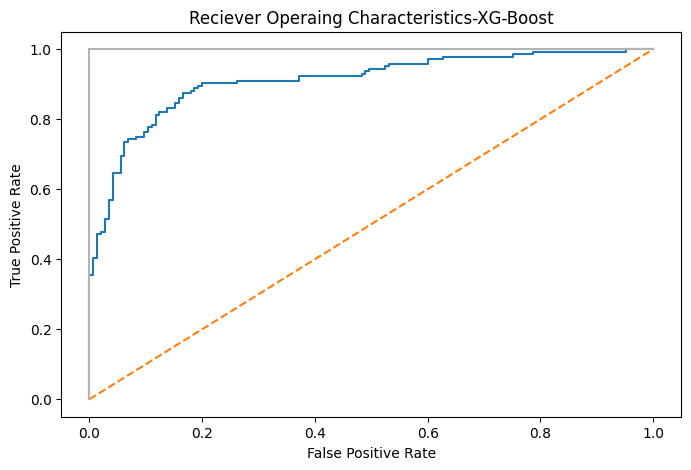

In [1023]:
plt.subplots(1,figsize=(8,5))
plt.title('Reciever Operaing Characteristics-XG-Boost')
plt.plot(fpr_xg,tpr_xg)
plt.plot([0,1],ls="--")
plt.plot([0,0],[1,0],c=".7"),plt.plot([1,1],c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [586]:
np.set_printoptions(formatter={'float_kind':'{:f}'.format})

In [1024]:
pred=xgb.predict_proba(X_test)

c:\Users\rames\OneDrive\Desktop\guvi-ds\loan_default\.venv\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\rames\OneDrive\Desktop\guvi-ds\loan_default\.venv\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\rames\OneDrive\Desktop\guvi-ds\loan_default\.venv\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\rames\OneDrive\Desktop\guvi-ds\loan_default\.venv\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a

In [1025]:
pred[5]

array([0.95739174, 0.04260828], dtype=float32)

In [1026]:
xgb.predict_proba([[46,37283.054601,474,0.456731,40192.994312,15159.338369,11.727471,69,0,1,0]])

array([[0.02014047, 0.97985953]], dtype=float32)

In [589]:
X_test

Age        Income  Credit_Score  Debt_to_Income_Ratio  \
104    20  37969.248948           700              0.230319   
1138   32  44540.774408           591              0.329273   
729    60  84354.976614           485              0.818301   
983    56  35870.061898           387              0.869370   
550    18  85695.862604           732              0.934893   
...   ...           ...           ...                   ...   
1077   55  42433.291893           696              0.154143   
595    37  73837.329792           504              0.997977   
685    56  62670.930301           721              0.078930   
946    40  93888.946276           697              0.058584   
1065   24  47959.879366           822              0.184907   

      Existing_Loan_Balance   Loan_Amount  Interest_Rate  \
104             9475.952162  39758.494983       4.008251   
1138           38900.117709  12271.757737       6.440102   
729            32711.498900  41643.544265       8.144067   
983            17806.494670  25595.488082       4.823031   
550            24079.457011  19627.593953      15.626422   
...                     ...           ...            ...   
1077           36138.940324  36697.194033      17.227295   
595            35544.716523  49418.706380      18.532383   
685            39764.392452  24456.019647       3.432601   
946            28515.788844  27361.121920       9.150555   
1065             782.516655  13332.856318       8.857145   

      Loan_Duration_Months  Employment_Status_Unemployed  Location_Suburban  \
104                     13                             0                  1   
1138                    49                             0                  0   
729                     58                             0                  1   
983                     55                             0                  0   
550                     43                             1                  0   
...                    ...                           ...                ...   
1077                    45                             0                  0   
595                     26                             1                  0   
685                     33                             1                  0   
946                     43                             0                  0   
1065                    16                             0                  0   

      Location_Urban  
104                0  
1138               0  
729                0  
983                0  
550                1  
...              ...  
1077               1  
595                0  
685                0  
946                0  
1065               0  

[289 rows x 11 columns]

In [554]:
rf=X[['Age','Income','Debt_to_Income_Ratio','Existing_Loan_Balance','Credit_Score','Loan_Amount','Interest_Rate']]

In [555]:
rf

Age        Income  Debt_to_Income_Ratio  Existing_Loan_Balance  \
0     56  71266.105175              0.007142           27060.188289   
1     46  37283.054601              0.456731           40192.994312   
2     32  69567.036392              0.329231           25444.262759   
3     60  72016.087392              0.052482            3122.213749   
4     25  32161.988250              0.450236           19197.350445   
..   ...           ...                   ...                    ...   
994   27  61703.683812              0.835540            1486.813065   
995   22  98081.105862              0.961613            3586.586891   
996   40  30044.017181              0.775082           32993.493341   
997   27  21355.813191              0.621937           21579.216456   
999   19  84572.442989              0.849470           49629.885929   

     Credit_Score   Loan_Amount  Interest_Rate  
0             639  13068.330587      18.185533  
1             474  15159.338369      11.727471  
2             750   6131.287659      17.030462  
3             435  37531.880251      16.868949  
4             315  41466.397989      18.891582  
..            ...           ...            ...  
994           306   8447.484392      11.445092  
995           727  41473.241896       3.700707  
996           416  48942.588814      12.932559  
997           806  34010.252873       3.825633  
999           624  49850.267385      16.606985  

[897 rows x 7 columns]

In [556]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
scaler.fit(rf)



StandardScaler()

In [557]:
scaled_data = scaler.transform(rf)


In [558]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

In [559]:
pca.fit(scaled_data)

PCA(n_components=2)

In [560]:
x_pca = pca.transform(scaled_data)

Text(0, 0.5, 'Second Principal Component')

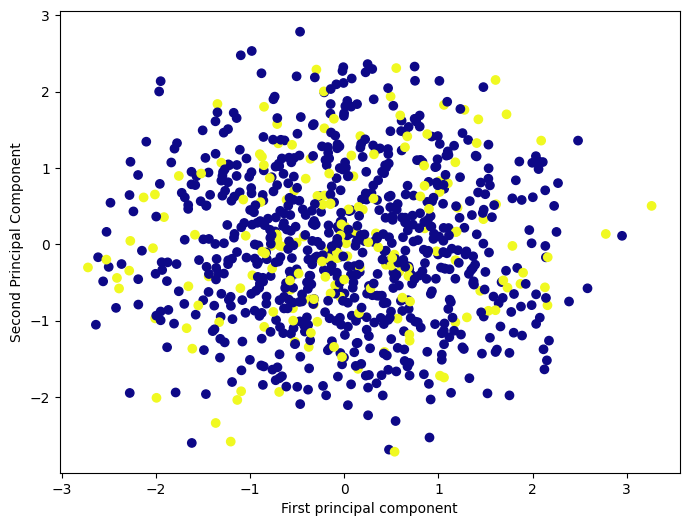

In [561]:


plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=df_2['Loan_Status'],cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')



In [562]:
import numpy as np

from sklearn import metrics
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.3, min_samples=10).fit(x_pca)
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 1
Estimated number of noise points: 113


In [563]:
print(f"Homogeneity: {metrics.homogeneity_score(y, labels):.3f}")
print(f"Completeness: {metrics.completeness_score(y, labels):.3f}")
print(f"V-measure: {metrics.v_measure_score(y, labels):.3f}")
print(f"Adjusted Rand Index: {metrics.adjusted_rand_score(y, labels):.3f}")
print(
    "Adjusted Mutual Information:"
    f" {metrics.adjusted_mutual_info_score(y, labels):.3f}"
)
print(f"Silhouette Coefficient: {metrics.silhouette_score(X, labels):.3f}")

Homogeneity: 0.001
Completeness: 0.001
V-measure: 0.001
Adjusted Rand Index: 0.015
Adjusted Mutual Information: -0.001
Silhouette Coefficient: 0.067


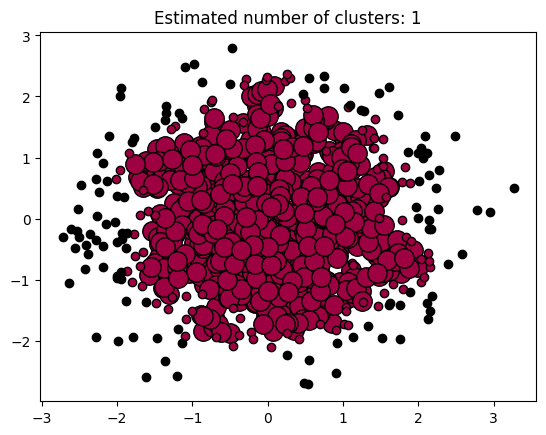

In [564]:
unique_labels = set(labels)
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = x_pca[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = x_pca[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title(f"Estimated number of clusters: {n_clusters_}")
plt.show()

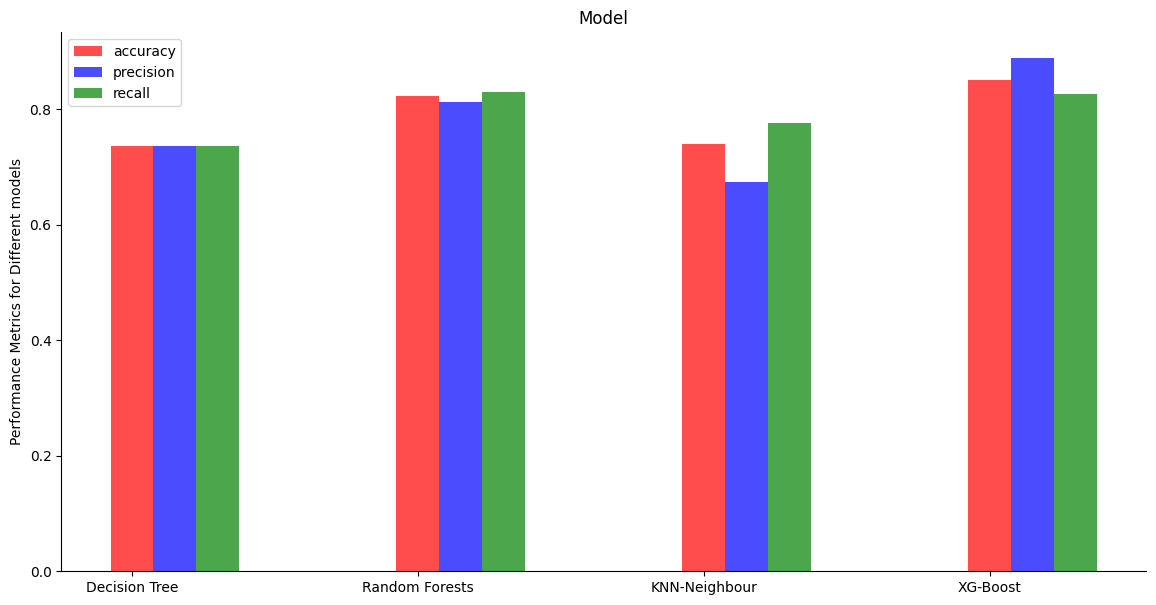

In [1036]:
plt.figure(figsize=(14, 7))
ax = plt.subplot(111)

models = ['Decision Tree', 'Random Forests','KNN-Neighbour','XG-Boost']
values = [decision_tree_acc,random_forest_acc,knn_acc,xgb_acc]
model = np.arange(len(models))

plt.bar(model, values, align='center', width = 0.15, alpha=0.7, color = 'red', label= 'accuracy')
plt.xticks(model, models)

           
ax = plt.subplot(111)

models = ['Decision Tree', 'Random Forests','KNN-Neighbour','XG-Boost']
values = [decision_tree_prec,random_forest_prec,knn_prec,xgb_prec]
model = np.arange(len(models))

plt.bar(model+0.15, values, align='center', width = 0.15, alpha=0.7, color = 'blue', label = 'precision')
plt.xticks(model, models)



ax = plt.subplot(111)

models = ['Decision Tree', 'Random Forests','KNN-Neighbour','XG-Boost' ]
values = [decision_tree_recall,random_forest_recall,knn_recall,xgb_recall]
model = np.arange(len(models))

plt.bar(model+0.3, values, align='center', width = 0.15, alpha=0.7, color = 'green', label = 'recall')
plt.xticks(model, models)



plt.ylabel('Performance Metrics for Different models')
plt.title('Model')
    
# removing the axis on the top and right of the plot window
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend()

plt.show()           

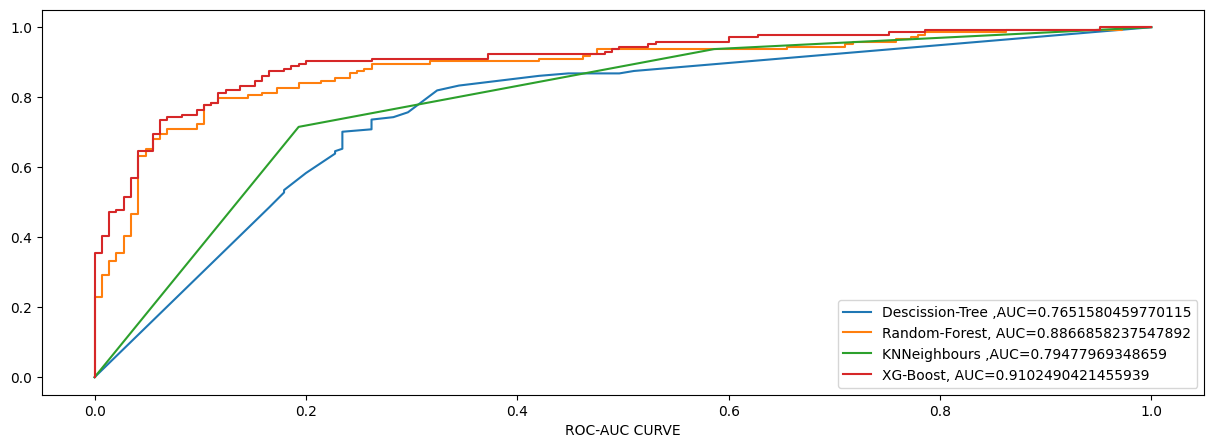

In [1035]:
plt.figure(figsize=(15,5)).clf()
plt.plot(fpr_d,tpr_d,label="Descission-Tree ,AUC="+str(auc_d))
plt.plot(fpr_rf,tpr_rf,label="Random-Forest, AUC="+str(auc_rf))
plt.plot(fpr_kn,tpr_kn,label="KNNeighbours ,AUC="+str(auc_kn))
plt.plot(fpr_xg,tpr_xg,label="XG-Boost, AUC="+str(auc_xg))
plt.xlabel("ROC-AUC CURVE")

plt.legend()